# 0. 前準備

## 0.1 データ
* データ （ダウンロード後、指示に従ってアップロードする）CSV形式：[exp_data.csv](https://github.com/HumanomeLab/TMDU_lecture_2019/blob/master/data/exp_data.csv)

データは、行が被験者、列が遺伝子発現量の行列。元はTCGA (The caner genome atlas)の肺腺がん(adenocarcinoma)と扁平上皮がんの遺伝子発現データ。それを講義用に前処理したものである。被験者IDや遺伝子名は、TCGAから提供されているものであり、加工はしていない。組織も形態も、全く種類の違う癌腫だが、あくまでテストと思ってもらえればと思います。

最終列が"class"というラベルになっており、0が肺腺がんの被験者、1が扁平上皮がんの被験者です。

## 0.2 ライブラリの読み込み

* 演習に必要なpythonのライブラリを読み込む

今日の演習では、描画にmatplotlib を基に、様々な描画機能を追加する[seaborn](https://seaborn.pydata.org/) を利用する。Collaboratory には、seaborn 0.7.1 がインストールされているが、matplotlib のバージョンと合わない（matplotlibが新しい）ので、0.9.0をインストールする。

In [0]:
# 頭に"!"をつけると、ターミナルのコマンドが実行される
# pipはpythonのパッケージ管理プログラムで、以下を実行することで、
# seabornの0.9.0がインストールされる。
# インストールが成功すると、"Restert Runtime"のボタンが現れるので、
# クリックして、このCollaboratoryを再起動すること。エラーが現れず、
# "Requirement already satisfied"とインストールが全てスキップされたら、
# すでにインストールは完了している。
! pip install seaborn -U

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
# パッケージの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Seaborn のバージョン番号の表示。0.9.0になっていることを確かめる。
print(sns.__version__)

0.9.0


## 0.3 データの読み込み

1.   0.1にあるCSVファイルをダウンロードする
2.   左のWindowの"ファイル" からアップロードする（講義資料参照）
3.   CSVファイルを読み込み、下記の二つのデータを作成する。
  1. ``df_class``：各サンプルの遺伝子発現量（特徴量）と、サンプルのクラスの情報を保持。サンプル数は994、遺伝子数（次元）は906。クラスは 0か1。
  2. ``df``：各サンプルの特徴量のみを保持。``df``からクラスの情報を削除したもの。

アップロードしたCSVファイルを読み込んで、変数``df``へ保存する。Pandas にCSVを読み込むための関数 read_csv があるので、利用する。

In [0]:
df_class = pd.read_csv("exp_data.csv", encoding='utf-8', index_col="Name")

読み込んだデータの行数と列数を調べる。（結果：行数994、列数907）
時々、読み込みに失敗するようなので、結果が異なる場合には、上記のread_csvを再度実行して、再読込を行う。

In [0]:
df_class.shape

(994, 907)

被験者のクラスの分布を調べる。クラス0(肺腺がん)が510名、クラス1(扁平上皮癌)が484名のデータである。

In [0]:
import collections
collections.Counter(df_class["class"])

Counter({0: 510, 1: 484})

読み込んだ結果の初め5行だけを表示する。行や列が意図通りに、確かに読み込まれていることを確認する。

In [0]:
df_class.head()

,AAMP,AARS2,ABCA9,ABCB1,ABCG4,ABI1,ABL1,ABL2,ABRAXAS1,ACKR3,...,ZNF24,ZNF300,ZNF331,ZNF384,ZNF521,ZNF703,ZNF750,ZNF91,ZRSR2,class
Name,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,3.282248,2.713430,1.349093,1.034275,0.957885,3.233042,3.043563,3.158757,2.366688,2.267188,...,3.359021,1.778441,2.644316,3.039565,1.643284,1.440541,1.196126,2.190295,2.171302,0
TCGA-05-4249-01,3.350033,2.504217,1.625068,1.307139,0.285940,3.325516,3.338514,3.104723,2.386709,2.065303,...,3.316819,1.087583,2.598761,2.888551,2.168662,2.363922,3.014844,2.767630,2.222128,0
TCGA-05-4250-01,3.448539,2.614713,1.326784,1.922005,0.520601,3.267390,3.040958,3.090445,2.596986,2.443849,...,3.116099,1.111669,2.612623,2.817708,2.139697,1.498328,1.312996,2.239107,2.192704,0
TCGA-05-4382-01,3.392715,2.611913,1.178292,1.374585,0.224041,3.378336,3.317319,2.989185,2.318944,2.865239,...,3.237968,2.344622,2.574849,3.112709,2.282039,2.071797,2.183090,2.560793,2.278223,0
TCGA-05-4384-01,3.404000,2.604177,1.875856,1.798789,0.740197,3.185970,3.304465,3.014096,2.426532,2.492670,...,3.303015,1.735341,2.789842,3.077099,2.136200,2.169766,2.377017,2.514305,2.229997,0


クラスの情報（"class"列）を除き、"df"に保存する。

In [0]:
df = df_class.drop("class", axis=1)

行数と列数を表示して、1列少なくなっていることを確認する。

In [0]:
df.shape 

(994, 906)

In [0]:
df.head()

,AAMP,AARS2,ABCA9,ABCB1,ABCG4,ABI1,ABL1,ABL2,ABRAXAS1,ACKR3,...,ZNF217,ZNF24,ZNF300,ZNF331,ZNF384,ZNF521,ZNF703,ZNF750,ZNF91,ZRSR2
Name,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,3.282248,2.713430,1.349093,1.034275,0.957885,3.233042,3.043563,3.158757,2.366688,2.267188,...,3.619772,3.359021,1.778441,2.644316,3.039565,1.643284,1.440541,1.196126,2.190295,2.171302
TCGA-05-4249-01,3.350033,2.504217,1.625068,1.307139,0.285940,3.325516,3.338514,3.104723,2.386709,2.065303,...,4.190645,3.316819,1.087583,2.598761,2.888551,2.168662,2.363922,3.014844,2.767630,2.222128
TCGA-05-4250-01,3.448539,2.614713,1.326784,1.922005,0.520601,3.267390,3.040958,3.090445,2.596986,2.443849,...,3.535461,3.116099,1.111669,2.612623,2.817708,2.139697,1.498328,1.312996,2.239107,2.192704
TCGA-05-4382-01,3.392715,2.611913,1.178292,1.374585,0.224041,3.378336,3.317319,2.989185,2.318944,2.865239,...,3.238390,3.237968,2.344622,2.574849,3.112709,2.282039,2.071797,2.183090,2.560793,2.278223
TCGA-05-4384-01,3.404000,2.604177,1.875856,1.798789,0.740197,3.185970,3.304465,3.014096,2.426532,2.492670,...,3.121809,3.303015,1.735341,2.789842,3.077099,2.136200,2.169766,2.377017,2.514305,2.229997


# 1. 次元削減

## 1.1 PCA (主成分分析)

PCAを利用するためのライブラリを読み込む。

In [0]:
import sklearn.decomposition

### 1.1.1 PCAの実行（正規化なし）

* PCAを用いてサンプル間の関係を調べる
* 第一主成分と第二主成分で、サンプル間の関係を可視化する

In [0]:
# PCA実行
# PCAを実行するための"容器"を用意
pca = sklearn.decomposition.PCA()
# 実際に主成分分析を実施する。coords には、PCA後の座標が入る
coords = pca.fit_transform(df.values)

PCAの結果の第一主成分 (PC1) と第二主成分 (PC2) でデータをプロットする。
まず、前準備として、散布図を描画し、クラス別に点を色分けする関数 ``scatter_plot`` を定義する。

In [0]:
def scatter_plot(coords, colors, xlabel=None, ylabel=None, title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(coords[:, 0], coords[:, 1], c=colors, alpha=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

PCAの結果を表示する。点はサンプルを表す。

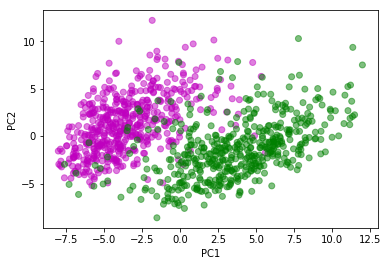

In [0]:
# クラス0のサンプルをマゼンダで、クラス1のサンプルを緑で描画する
# ために、各点の色を指定する
colors = [['m','g'][x] for x in df_class['class']]  
scatter_plot(coords, colors, xlabel='PC1', ylabel='PC2')  # 散布図を描画する

### 1.1.2 正規化とPCAの実行

* PCAでは中心化は必ず行われるが、分散の調整は行われない。
* 用途に寄っては、分散を全ての変数（遺伝子）で1にする、あるいは、各被験者の遺伝子発現量を平均0、分散1にするような正規化などが、PCA実施前に行われる
* 解析の目的に依存するので、王道がある訳ではない


正規化で利用するライブラリをインポートする。

In [0]:
import sklearn.preprocessing

``sklearn.preprocessing.StandardScaler`` を使って正規化する。``with_mean=True`` の指定で平均0に、``with_std=True``で分散1に変換する。

In [0]:
values = df.values
scaler = sklearn.preprocessing.StandardScaler(with_mean=True, with_std=True)  # 正規化の方法を指定
std_values = scaler.fit_transform(values)  # 2行目で定義した正規化の方法に従い, データを正規化
std_df = pd.DataFrame(std_values, index=df.index, columns=df.columns)

正則化後のデータ std_df を出力する。

In [0]:
std_df.head()

,AAMP,AARS2,ABCA9,ABCB1,ABCG4,ABI1,ABL1,ABL2,ABRAXAS1,ACKR3,...,ZNF217,ZNF24,ZNF300,ZNF331,ZNF384,ZNF521,ZNF703,ZNF750,ZNF91,ZRSR2
Name,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.909766,0.193972,-0.264594,-1.133902,0.997571,-0.075607,-1.309942,1.221062,0.448122,-1.107828,...,1.896128,0.991769,-0.119259,0.189188,-0.301573,-1.050831,-1.599514,-1.803597,-0.449061,-0.543602
TCGA-05-4249-01,-0.361582,-0.968917,0.390000,-0.504841,-0.462794,0.538881,0.430457,0.927797,0.542384,-1.434689,...,4.673915,0.734816,-1.626464,0.034933,-1.280748,0.264951,0.274579,0.822358,1.201461,-0.283642
TCGA-05-4250-01,0.435056,-0.354737,-0.317508,0.912679,0.047206,0.152637,-1.325311,0.850308,1.532395,-0.821806,...,1.485882,-0.487298,-1.573917,0.081871,-1.740096,0.192408,-1.482228,-1.634856,-0.309516,-0.434138
TCGA-05-4382-01,-0.016408,-0.370297,-0.669721,-0.349348,-0.597321,0.889873,0.305394,0.300733,0.223334,-0.139558,...,0.040375,0.254719,1.115943,-0.046034,0.172694,0.548898,-0.318317,-0.378569,0.610143,0.003265
TCGA-05-4384-01,0.074861,-0.413296,0.984850,0.628615,0.524461,-0.388401,0.229543,0.435937,0.729876,-0.742764,...,-0.526890,0.650764,-0.213289,0.681949,-0.058202,0.183652,-0.119481,-0.098569,0.477238,-0.243398


各サンプルの正規化後の発現量を確認する。例えば、400番目のサンプルの発現量の平均値を出力する。

In [0]:
np.mean(df.loc["TCGA-05-4249-01",])  # 正規化前の"TCGA-05-4249-01"の発現量の平均値

2.8052293957476313

In [0]:
np.mean(std_df.loc["TCGA-05-4249-01",])  # 正則化後の平均値

0.16474070840827776

同様に、特定の遺伝子に着目して、正規化の前後で発現量を確認する。例えば、'AAMP'の遺伝子の発現量の平均は下記のコードで実行する。

In [0]:
np.mean(df['AAMP'])  # 正規化前

3.3947434387876463

In [0]:
np.mean(std_df['AAMP'])  # 正則化後
# 平均が0になるように正規化したので、ほとんど０の値になる

1.4861798355797116e-15

正則化後のデータ（std_df）に対してPCAを実施し、第一主成分と第二主成分でサンプルをプロットする。 

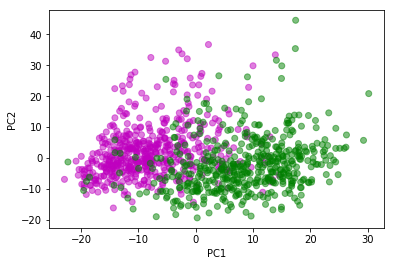

In [0]:
pca = sklearn.decomposition.PCA()
coords = pca.fit_transform(std_df.values)
colors = [['m','g'][x] for x in df_class['class']]  # クラス0のサンプルをマゼンダで、クラス1のサンプルを緑で描画する
scatter_plot(coords, colors, xlabel='PC1', ylabel='PC2')

### 1.1.3 寄与率と寄与度

各主成分の寄与率を調べるには、``pca.explained_variance_ratio_`` を参照する。下記を実行すると、上位20の寄与率の値がわかる。

In [0]:
pca.explained_variance_ratio_[0:20]

array([0.14196424, 0.09148832, 0.06142091, 0.04336422, 0.0344966 ,
       0.03182005, 0.0226638 , 0.01813486, 0.01604148, 0.01335161,
       0.01228304, 0.01108306, 0.01077675, 0.01020863, 0.00935565,
       0.00921536, 0.00837167, 0.0077278 , 0.00757904, 0.00701325])

下記のコードを実行すると、寄与率が上記20個の寄与率の値を取得し、棒グラフで可視化できる。

<BarContainer object of 20 artists>

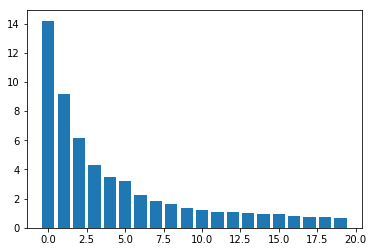

In [0]:
# 各主成分の「寄与率」の可視化
# 上位20個の寄与率を取得し, %表示に変換する
explained_variance_percent = [x*100 for x in (pca.explained_variance_ratio_[0:20])] 
plt.bar(range(20), explained_variance_percent)
#plt.bar(range(20), [x*100 for x in (pca.explained_variance_ratio_[0:20])])

各主成分に寄与している遺伝子群を調査する。
PCAの結果の寄与度は、(pca.components_)に入っているので、これを Pandasに読み込ませる。
後でソートする関係で、行が遺伝子名、列が各主成分とする。

In [0]:
components = pd.DataFrame(pca.components_.T, index=df.columns, columns=["PC{}".format(x + 1) for x in range(len(df.columns))])

PC1の寄与度上位５遺伝子の情報を表示する。DNA修復、タンパク質のコーディング関連が多い印象。
PCAの値は正負に意味はないので、値が小さい方から数遺伝子を見るのも良い。

In [0]:
components.sort_values(by=["PC1"], ascending=False).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC897,PC898,PC899,PC900,PC901,PC902,PC903,PC904,PC905,PC906
RAD51,0.070069,-0.004768,0.039401,-0.004385,0.041349,0.038871,0.001142,-0.012458,0.000445,-0.020113,...,0.046606,0.045999,0.083897,-0.075046,0.072162,-0.014962,0.141298,0.079578,-0.022938,-0.026564
FANCI,0.069919,-0.026974,0.020353,0.007392,0.048538,0.020486,-0.007145,-0.018617,0.007917,-0.011056,...,0.073436,-0.058835,-0.058121,0.062760,-0.017554,0.096543,0.050310,-0.050838,-0.079456,0.060943
GMPS,0.068931,-0.018385,0.034969,0.012319,0.014053,0.014062,-0.019006,-0.003779,-0.014738,-0.014308,...,0.017470,-0.124332,0.019701,-0.103279,-0.090577,0.029687,0.073872,-0.043205,0.005559,-0.109893
DKC1,0.067926,-0.011033,0.007645,0.011534,0.032111,0.012927,-0.012196,-0.013516,-0.024378,-0.002781,...,0.012648,-0.003382,0.036070,-0.003179,0.065652,0.021812,0.026259,0.017146,0.122309,0.013586
BUB1B,0.067673,-0.026917,0.019223,0.002829,0.055762,0.050807,0.007301,-0.013081,0.003978,-0.008873,...,0.013267,0.070852,-0.056664,0.005939,0.022247,0.143367,-0.071579,0.024156,-0.020341,-0.040952


同様に第二主成分の詳細を見てみる。リボソーム関連が多い印象。

In [0]:
components.sort_values(by=["PC2"], ascending=False).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC897,PC898,PC899,PC900,PC901,PC902,PC903,PC904,PC905,PC906
RPS14,-0.003651,0.070106,0.035947,0.018790,0.006767,-0.034297,-0.005590,-0.012480,0.011610,0.004476,...,0.041410,0.060902,0.048347,-0.066321,-0.065165,0.059231,-0.030068,0.030129,0.000061,0.008712
RPL15,-0.010433,0.064865,0.027467,0.035680,0.001583,-0.047691,-0.006063,-0.006425,0.009781,0.022213,...,-0.003056,-0.000759,-0.039717,-0.085390,0.038493,-0.014535,-0.100915,-0.013704,0.014127,-0.133508
RPL13,-0.001344,0.062797,0.008577,-0.028093,0.001507,-0.031516,0.019846,-0.032827,0.022797,0.001022,...,0.037273,-0.022722,0.054683,0.032795,0.036403,0.008219,0.035683,0.053095,-0.049209,-0.013159
SDHAF2,0.013561,0.061568,0.020889,0.018356,0.019740,-0.012527,0.031625,0.030240,-0.005213,-0.047746,...,-0.007735,-0.015683,0.041778,-0.036663,-0.046597,-0.011460,-0.021654,0.010167,0.048161,0.000332
SDHB,0.020861,0.060277,0.038523,0.020491,0.026697,0.004204,0.009998,0.050436,0.022461,-0.051128,...,0.031501,-0.021154,-0.001393,0.015065,0.057620,-0.035759,-0.016191,0.013121,-0.022897,0.081650


# 2. 非線形次元圧縮

正則化後のデータセット std_df に対して  t-SNE で次元削減をし、その結果を可視化する。

t-SNE は、sklearn.manifold.TSNE で計算できる。

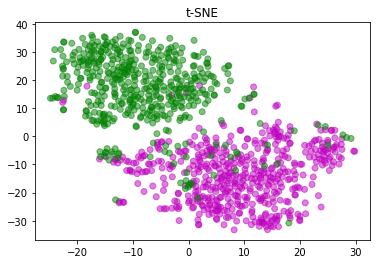

In [0]:
tsne = sklearn.manifold.TSNE(n_components=2)
coords = tsne.fit_transform(std_df.values)
scatter_plot(coords, colors, title='t-SNE')

# 3. クラスタリング

階層型クラスタリングと、k-meansを実行する。

## 3.1 階層的クラスタリング

``sns.clustermap`` を用いて階層型クラスタリングをする。
* ``method``: 'average'で平均結合法を指定する。他、 single（単連結法）、complete（完全連結法）、ward（ウォード法）などがある。
* ``metric``: 距離関数を指定する。'correlation'で相関を指定している。他にも、'euclidean'（ユークリッド距離）を含むいくつかの距離が指定できる。

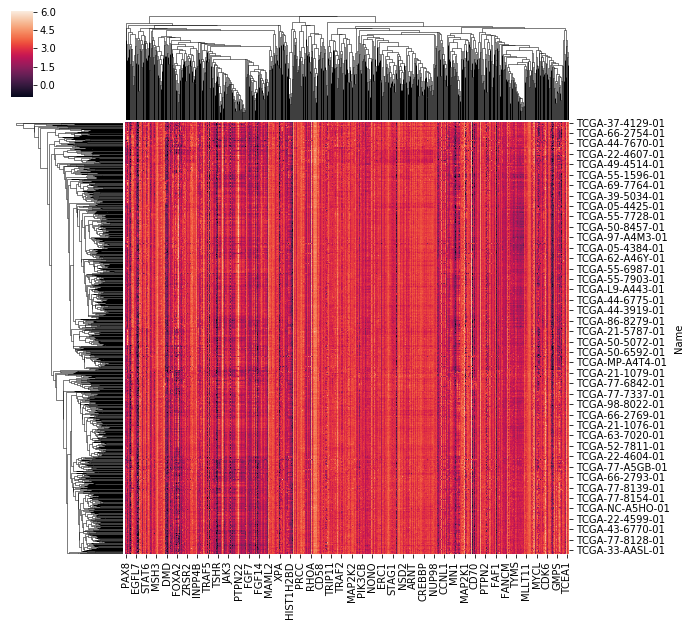

In [0]:
sns.clustermap(df, method='average', metric='correlation')

In [0]:
# 分散上位20個の遺伝子を出力する
df.var(axis=0).sort_values(ascending=False).index[:20]

Index(['TP63', 'NTRK2', 'WIF1', 'HMGA2', 'NKX2-1', 'EPHA7', 'SLC34A2', 'CPS1',
       'PTPRT', 'SOX2', 'FOXA2', 'DUSP9', 'ROS1', 'GRIN2A', 'VTCN1', 'COL11A1',
       'DNAH12', 'DKK1', 'ALOX12B', 'CDKN2A'],
      dtype='object')

In [0]:
# 遺伝子の分散上位20遺伝子、個人内の分散上位20人の発現量を抜き出す
top20_df = df.loc[df.var(axis=1).sort_values(ascending=False).index[:20], 
                  df.var(axis=0).sort_values(ascending=False).index[:20]]

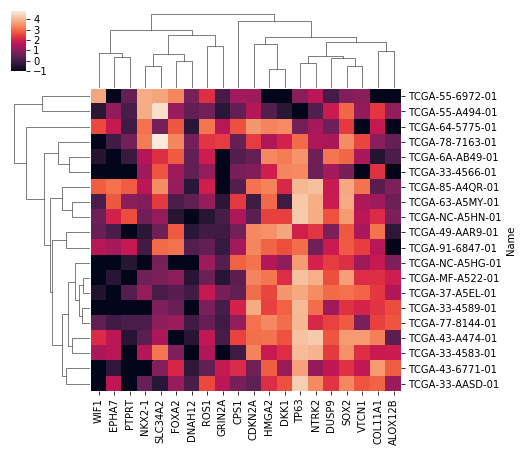

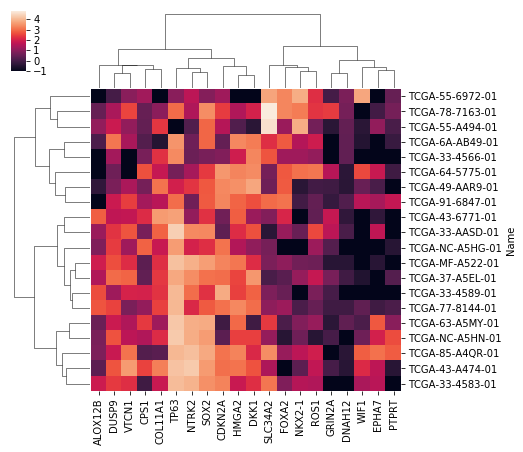

In [0]:
# サンプル間の距離計算手法、クラスター間の距離計算手法による違い
sns.clustermap(top20_df, method='average', metric='correlation', figsize=(7, 7))
sns.clustermap(top20_df, method='ward', metric='euclidean', figsize=(7, 7))

## 3.2 K-Means

k-meansで利用するライブラリを読み込む。

In [0]:
import sklearn.cluster

### 3.2.1 K-meansの実施

サンプルを2個のクラスタ（0か1）に分割する。i番目のサンプルの分類結果をi番目の要素に有する配列で、分類結果を表す。

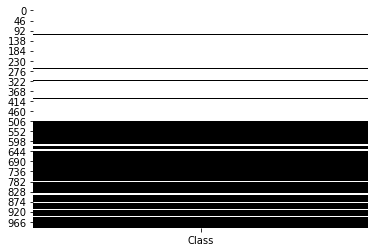

In [0]:
model = sklearn.cluster.KMeans(n_clusters=2)
y = model.fit_predict(df.values)
sns.heatmap(pd.DataFrame(y, columns=["Class"]), cmap='Greys', cbar=False)

### 3.2.2 シルエット分析 (参考)

シルエット分析でクラスタの個数を推定する。

下記のコードにある``plot_silhouette``関数は、特定のクラスタ数 (n_components) に対してk-meansを実施し、そのシルエット図と（左図）、クラスタリングの結果（右図）を描画する。

コードの最後の2行で、クラスタ数を2, 3, 4個と変えて``plot_silhouette`` を呼び出し、結果のシルエット図を比較する。

n_clusters: 2  Average silhouette score = 0.13719954600840845


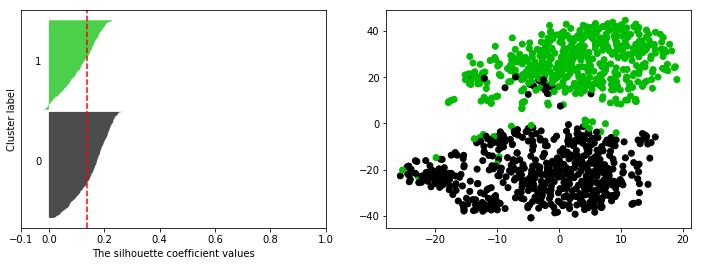

n_clusters: 3  Average silhouette score = 0.1071411455471978


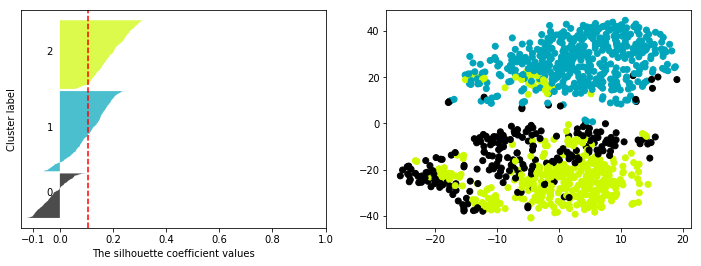

n_clusters: 4  Average silhouette score = 0.07979653540694608


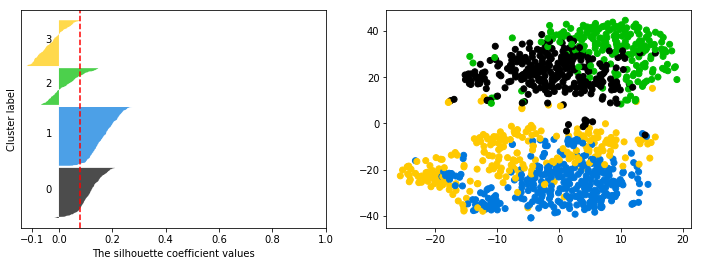

In [0]:
# シルエットスコアによる適切（っぽい）クラスタ数の推定
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = df.values
tsne = sklearn.manifold.TSNE(n_components=2)
coords = tsne.fit_transform(df.values)

def plot_silhouette(n_clusters):
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    model = sklearn.cluster.KMeans(n_clusters=n_clusters)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('n_clusters:',n_clusters,' Average silhouette score =',silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = np.sort(sample_silhouette_values[cluster_labels == i])
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cluster_colors = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=cluster_colors, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    cluster_colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(coords[:, 0], coords[:, 1], c=cluster_colors)
    plt.show()

for n_clusters in [2, 3, 4]:
    plot_silhouette(n_clusters)